In [ ]:
from statistics import median

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Titanic.csv')
# print(df.head())

# colunas = ['Ticket','Cabin','Parch','SibSp','PassengerId'] # especificando as colunas q eu quero remover
# df = df.drop(columns=colunas) # Remove colunas desnecessárias
print(df)

# Explicando o que cada codigo faz
 # print(df.info()) - significa as iformações gerais da tabela
 # print(df.describe()) - Significa o resumo estatistico do data drame
# print(df['Sex'].value_counts()) # Valores agrupados por sexo
# print(df['Embarked'].value_counts()) # Valores agrupados de onde as pessoas embarcaram, que no caso seria três portões diferentes
# print(df.isnull().sum()) - Verifica se todas as colunas estão com alguma informação em branco, e mostra quantas tem por coluna





In [58]:
# df = df.drop_duplicates() Remove linhas duplicadas do Data Frame
# df['Age'].fillna(df['Age'].median()) Preenche os valores faltando com a mediana das idades
# df['Embarked'].fillna(df['Embarked'].mode()[0]) Preenche os valores faltando na coluna com os que mais aparecem
# df['Survived'] = df['Survived'].astype(bool) converte a coluna pra booleano, tipo se torna um true ou false 1 pra viveu e 0 pra morreu
# print(df.isnull().sum()) Mostra os valores por colunas, por exemplo, nesse caso é zero



Survived        0
Pclass          0
Name            0
Sex             0
Age             0
Fare            0
Embarked        0
faixa_etaria    0
dtype: int64


In [ ]:
# Criando nova coluna: Faixa etária
def categorize_age(age):
    if age < 18: return 'Criança'
    elif age < 60: return 'Adulto'
    else: return 'Idoso'
df['faixa_etaria'] = df['Age'].apply(categorize_age)
# Filtrando dados: somente sobreviventes
survivors = df[df['Survived'] == True]
print(survivors.head())
# Agrupando e agregando: Taxa de Sobrevivencia por classe e sexo
grouped = df.groupby(['Pclass', 'Sex']).agg({
    'Survived': 'mean', # Media = taxa de sobrevivencia
    'Age': 'mean',
    'Fare': 'median'
}).reset_index()
print(grouped)

# Ordenando por tarifa decrescente
print(df.sort_values(by='Fare', ascending=False).head())

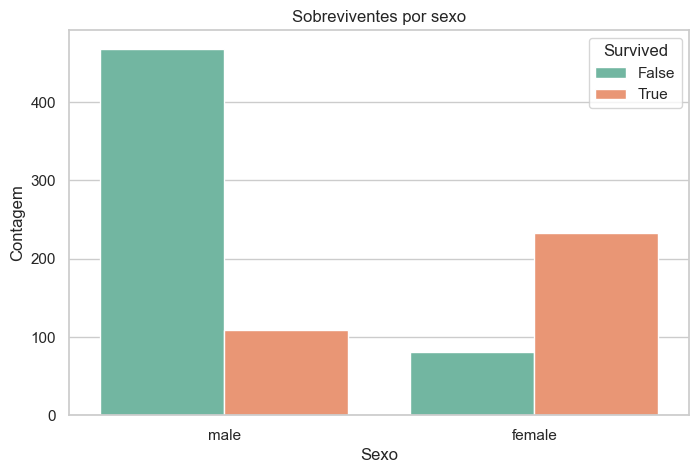

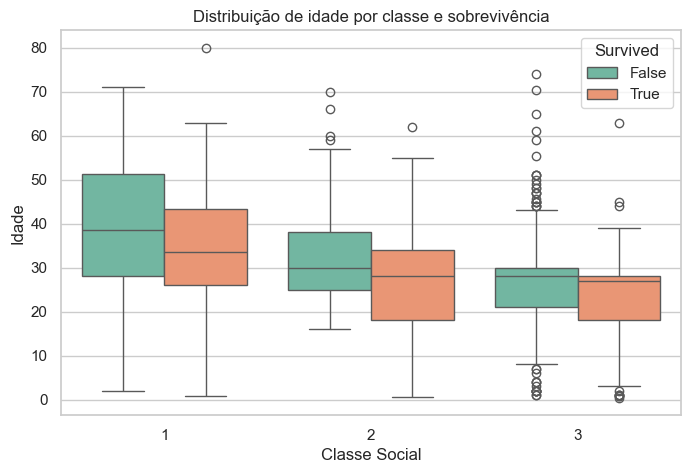

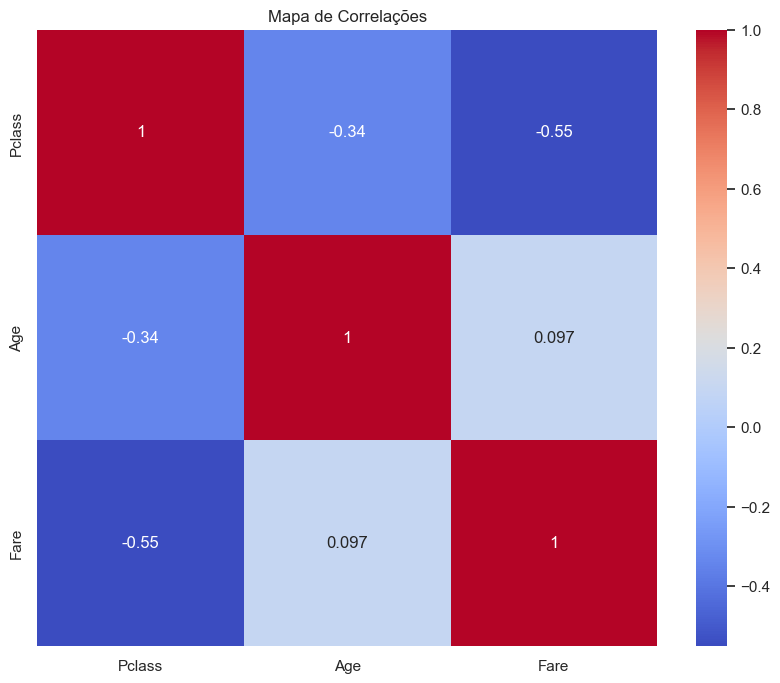

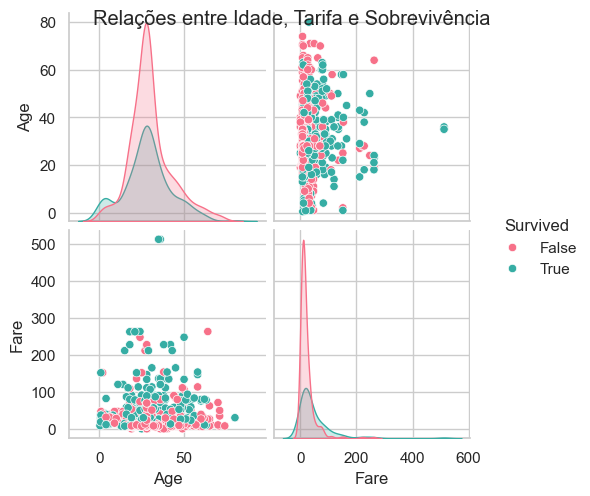

In [56]:
# Configurando estilo do Seaborn
sns.set(style='whitegrid')

# Grafico 1: contagem de sobreviventes por sexo
plt.figure(figsize = (8, 5))
sns.countplot(data=df, x='Sex',hue='Survived', palette='Set2')
plt.title('Sobreviventes por sexo')
plt.xlabel('Sexo')
plt.ylabel('Contagem')
plt.show()
# Grafico 2: Boxplt de idade por classe social
plt.figure(figsize = (8, 5))
sns.boxplot(data=df, x='Pclass', y='Age', hue='Survived',palette='Set2')
plt.title('Distribuição de idade por classe e sobrevivência')
plt.xlabel('Classe Social')
plt.ylabel('Idade')
plt.show()
#Grafico 3: Mapa de calor de correlações (somente numericos)
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr = numeric_df.corr()
plt.figure(figsize = (10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Mapa de Correlações')
plt.show()

# Grafico 4: Pairplot para relações multiplas
sns.pairplot(df, vars=['Age', 'Fare'], hue='Survived', palette='husl')
plt.suptitle('Relações entre Idade, Tarifa e Sobrevivência')
plt.show()

Classe: Pessoas que mais faleceram foram da classe 3 (economica)
Idade: Pessoas que mais faleceram foram os mais velhos (idosos)
Sexo: Pessoas que mais faleceram foram os homens

Conclusão: As pessoas que mais sobreviveram foram mulheres, da classe alta (1) e jovens (entre 18 e 30) ou crianças.

